<a href="https://colab.research.google.com/github/simonlevine/GNN-based-diag/blob/main/SegmentinSimpsUpdated2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!cd /content
!pip install --upgrade --force-reinstall --no-deps kaggle
import os
os.environ['KAGGLE_USERNAME'] = "serenaabraham" 
os.environ['KAGGLE_KEY'] = "0aa4e1881376dfb2149dcfb30ffe7975"


Mounted at /content/gdrive
     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.9-cp36-none-any.whl size=73265 sha256=b26195d1786c1071f90602f5d5823e70689f5fe6bba97f07a18ec6142e396c11
  Stored in directory: /root/.cache/pip/wheels/68/6d/9b/7a98271454edcba3b56328cbc78c037286e787d004c8afee71
Successfully built kaggle
  Found existing installation: kaggle 1.5.9
    Uninstalling kaggle-1.5.9:
      Successfully uninstalled kaggle-1.5.9


In [3]:
!kaggle datasets download -d andrewmvd/malignant-lymphoma-classification

malignant-lymphoma-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip -q /content/malignant-lymphoma-classification.zip

In [5]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 3.6MB/s 


In [6]:
from PIL import Image
import os
from math import sqrt
import pylab
import numpy as np
import cv2
import skimage
from skimage import io
from  skimage import feature, img_as_float
from skimage.feature import blob_log, blob_dog, blob_doh
from skimage.color import rgb2gray
import scipy
import mahotas as mh
import math
import matplotlib.pyplot as plt


In [7]:
im = Image.open('/content/CLL/sj-03-2810_001.tif')
im.show()

In [8]:
im=np.array(im)

In [9]:
im.shape

(1040, 1388, 3)

In [10]:
np.unique(im)

array([ 19,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 20

In [11]:
im2=Image.open('/content/CLL/sj-03-2810_002.tif')
im2.show()
original = io.imread('/content/CLL/sj-03-2810_002.tif', plugin='tifffile')
plt.imsave('/content/trial.png', original)

In [12]:
def segmentation(image):
	threshold=skimage.filters.threshold_li(image)
	segmented_image=image>=threshold
	fig,ax=plt.subplots(nrows=1,ncols=1)
	ax.imshow(segmented_image,cmap='gray')
	print(type(segmented_image))
	plt.show()

In [13]:
originalarray=np.array(original).astype(np.int)

In [14]:
type(originalarray)

numpy.ndarray

In [15]:
def image_show(image, nrows=1, ncols=1):
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols)#, figsize=(5, 5))
  print("1")
  DPI = fig.get_dpi()
  print("2")
  fig.set_size_inches(image.shape[0]/float(DPI),image.shape[1]/float(DPI))
  #fig.set_size_inches(image.shape[0], image.shape[1])
  #ax.imshow(image, cmap='gray')
  ax.imshow(image, cmap='Greys_r')
  print("3")
  ax.axis('off')
  print("4")
  fig.tight_layout()
  print("5")
  plt.show()
  return fig, ax

In [16]:
def segment(image):
  img = np.mean(image, axis=2)
  threshold = skimage.filters.threshold_otsu(img)
  #print(threshold)
  #image_show(img < threshold)
  #display_image_in_actual_size(img < threshold)
  return (img < threshold)
  return

In [28]:
#Segmenting all files
cllDir = '/content/CLL/'
cllDirOut = '/content/CLL/segmentedCLL/'
flDir = '/content/FL/'
flDirOut = '/content/FL/segmentedFL/'
mclDir = '/content/MCL/'
mclDirOut = '/content/MCL/segmentedMCL/'

!mkdir '/content/CLL/segmentedCLL'
!mkdir '/content/FL/segmentedFL'
!mkdir '/content/MCL/segmentedMCL'

'''
for fn in os.listdir(cllDir):

  if(fn.endswith('.tif')):
    original = io.imread(cllDir + fn, plugin='tifffile')
    plt.imsave(cllDir + fn + '.png', original)

    x = segment(original)
    plt.imsave(cllDirOut + fn + '_segmented' + '.png', x, cmap = 'Greys_r')
'''

for fn in os.listdir(flDir):

  if(fn.endswith('.tif')):
    original = io.imread(flDir + fn, plugin='tifffile')
    plt.imsave(flDir + fn + '.png', original)

    x = segment(original)
    plt.imsave(flDirOut + fn + '_segmented' + '.png', x, cmap = 'Greys_r')

for fn in os.listdir(mclDir):

  if(fn.endswith('.tif')):
    original = io.imread(mclDir + fn, plugin='tifffile')
    plt.imsave(mclDir + fn + '.png', original)

    x = segment(original)
    plt.imsave(mclDirOut + fn + '_segmented' + '.png', x, cmap = 'Greys_r')


In [30]:
count = 0
for fn in os.listdir(cllDir):
  if(fn.endswith('.tif')):
    count += 1

count2 = 0
for fn in os.listdir(flDir):
  if(fn.endswith('.tif')):
    count2 += 1
  
count3 = 0
for fn in os.listdir(mclDir):
  if(fn.endswith('.tif')):
    count3 += 1
print(count)
print(count2)
print(count3)

count = 0
for fn in os.listdir(cllDirOut):
  if(fn.endswith('.png')):
    count += 1

count2 = 0
for fn in os.listdir(flDirOut):
  if(fn.endswith('.png')):
    count2 += 1
  
count3 = 0
for fn in os.listdir(mclDirOut):
  if('segmented' in fn):
    count3 += 1
print(count)
print(count2)
print(count3)

113
139
122
113
139
122


In [ ]:
x = segment(original)
print(x.shape)
plt.imsave('/content/trialOutput.png', x, cmap='Greys_r')

/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: invalid value encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: invalid value encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma 

[[1039.         1316.            0.            7.        ]
 [1039.         1203.            0.            7.        ]
 [1039.         1184.            0.            7.        ]
 ...
 [   0.           86.            0.            9.66666667]
 [   0.           58.            0.            7.        ]
 [   0.           27.            0.            7.        ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: ignored

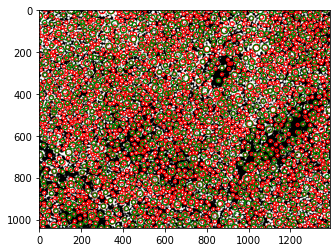

In [ ]:
img = cv2.imread('/content/trialOutput.png').astype(np.float)
im2 = img

blobs_log = blob_log(img, max_sigma=15, min_sigma = 7, threshold=7)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
print(blobs_log)
blobs_log = np.delete(blobs_log, 2, 1)


blobs_dog = blob_dog(img, max_sigma=20, min_sigma = 10, threshold=7)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_dog = np.delete(blobs_dog, 2, 1)

blobs_doh = blob_doh(rgb2gray(img), max_sigma=20, min_sigma = 10, threshold=7)
blobs_doh[:, 2] = blobs_doh[:, 2] * sqrt(2)

blobs_doh = np.delete(blobs_doh, 2, 1)

fig, ax = plt.subplots()
ax.imshow(im2)#/256)

for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=1.2, fill=False)
    ax.add_patch(c)

for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='green', linewidth=1.2, fill=False)
    ax.add_patch(c)

for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='blue', linewidth=1.2, fill=False)
    ax.add_patch(c)

DPI = fig.get_dpi()
fig.set_size_inches(im2.shape[0]/float(DPI),im2.shape[1]/float(DPI))
fig.tight_layout()
ax.axis('off')
plt.show()
fig.savefig("/content/gaussianblobOutput.png", bbox_inches='tight')

<class 'numpy.ndarray'>
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


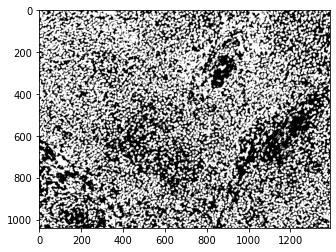

In [ ]:


dna = mh.imread('/content/trialOutput.png')
print(type(dna))
#dna = np.delete(dna, 3, axis=2)
dna = rgb2gray(dna)
dnaf = mh.gaussian_filter(rgb2gray(im2), 8)
#dnaf = rgb2gray(dnaf)

#print(dna)
#print(dna.shape)
rmax = mh.regmax(dnaf)
print(rmax)
pylab.imshow(dna)
#print(mh.overlay(dna, rmax))
pylab.imshow(mh.overlay(dna, rmax))
pylab.show()